In [1]:
#Installing Quandl
pip install quandl

     |████████████████████████████████| 51 kB 16 kB/s eta 0:00:01
You should consider upgrading via the '/home/jagdeep/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


__Importing packages__

In [2]:
import pandas as pd
import quandl as qd

__Extracting data using Quandl__

In [4]:
qd.ApiConfig.api_key = "API KEY"
msft_data = qd.get("EOD/MSFT", start_date="2010-01-01", end_date="2020-01-01")
msft_date.head()

AuthenticationError: (Status 400) (Quandl Error QEAx01) We could not recognize your API key: API KEY. Please check your API key and try again. You can find your API key under your account settings.

In [6]:
msft_data= pd.read_csv("MSFT.csv")
msft_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-05-17,246.550003,246.589996,243.520004,245.179993,243.199036,24970200
1,2021-05-18,246.270004,246.410004,242.899994,243.080002,241.116013,20168000
2,2021-05-19,239.309998,243.229996,238.600006,243.119995,241.712540,25739800
3,2021-05-20,243.960007,247.949997,243.860001,246.479996,245.053085,21800700
4,2021-05-21,247.570007,248.330002,244.740005,245.169998,243.750656,21863100


__Calculating Returns__

In [11]:
#assign 'Adj Close' to 'Close_price'
close_price= msft_data[['Adj Close']]

#retuns as fractional change
daily_return=close_price.pct_change()

#replacing NA values with 0
daily_return.fillna(0, inplace=True)

print(daily_return)

     Adj Close
0     0.000000
1    -0.008565
2     0.002474
3     0.013820
4    -0.005315
..         ...
247  -0.036945
248   0.018596
249  -0.033210
250  -0.019958
251   0.022596

[252 rows x 1 columns]


__Moving Averages__

In [13]:
#assigning adjusted closing prices to adj_prices
adj_price=msft_data['Adj Close']

#calculate the moving averages
mav= adj_price.rolling(window=50).mean()

#print the result
print(mav[-10:])

242    292.190599
243    292.067599
244    292.112800
245    292.054400
246    291.657200
247    291.002600
248    290.416800
249    289.728799
250    288.832000
251    288.135999
Name: Adj Close, dtype: float64


__Plot and see the difference:__

<AxesSubplot:>

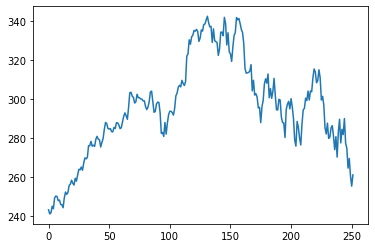

In [14]:
#import the matplotlib package to see the plot

import matplotlib.pyplot as plt
adj_price.plot()

<AxesSubplot:xlabel='Date'>

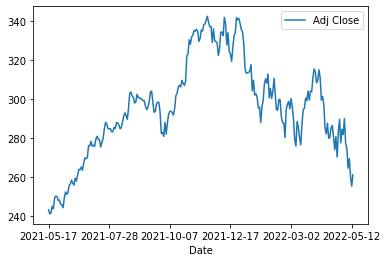

In [20]:
msft_data.plot(x='Date',y='Adj Close')

<AxesSubplot:>

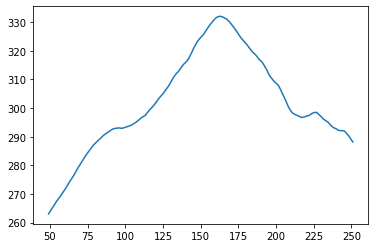

In [21]:
mav.plot()

<AxesSubplot:>

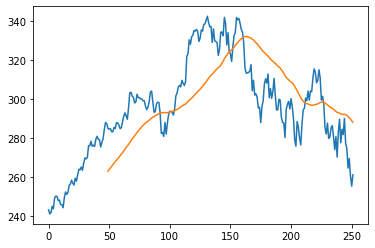

In [35]:
adj_price.plot()
mav.plot()